<a href="https://colab.research.google.com/github/ManikGo/Projects/blob/master/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Species Prediction Using Classification Techniques

Iris is a flowering plant with showy flowers.The iris dataset has four attributes namely:

1.   sepal length
2.   sepal width

1.   petal length
2.   petal width

**Species (Iris-setosa, Iris-versicolor, Iris-virginica)**











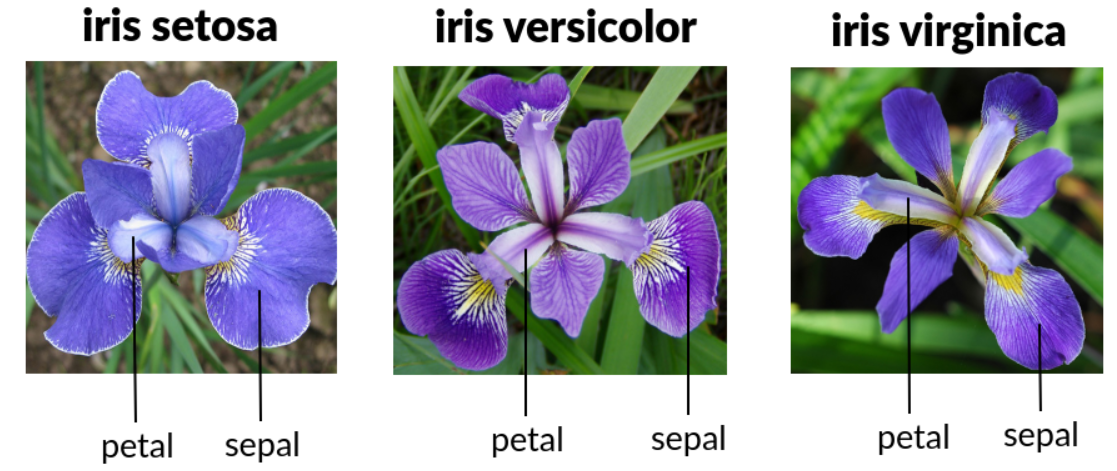

In [146]:
# Data processing
import pandas as pd
import numpy as np

# Visualisation, It enables the drawing of matplotlib figures in the IPython environment.
import matplotlib.pyplot as plt
%matplotlib inline 

In [147]:
path='/content/drive/MyDrive/Iris.csv'

In [148]:
iris=pd.read_csv(path)

In [149]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [150]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Drop Column ID

In [151]:
iris.drop(columns='Id', inplace=True) #We use inplace to remove permanantly

In [152]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Identify the shape of dataset

In [153]:
iris.shape #here (rows, column)

(150, 5)

# Get the list of Column

In [154]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Missing Values
    Pandas dataframe.isna() function is used to detect missing values.

In [155]:
iris.isna().values.any()

False

In [156]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Identify duplicate enteries
To find duplicates, we can simply call duplicated() method on the column.

In [157]:
iris[iris.duplicated(keep=False)] #show all rows with duplicates

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [158]:
iris[iris.duplicated()] #show only secondary  duplicates rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [159]:
iris.duplicated().value_counts() #count the number of duplicate data

False    147
True       3
dtype: int64

# Drop Duplicate Enteries

In [160]:
iris.drop_duplicates(inplace=True) # Drop Duplicate data
iris.shape

(147, 5)

In [161]:
iris.describe()  #data Description

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [162]:
iris.corr() #Correlation between columns

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


# Iris Dataset: Data Visualisation

In [163]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # data visualization

# the output of the data visualization will be redirected to the notebook
%matplotlib inline 

# Heatmap

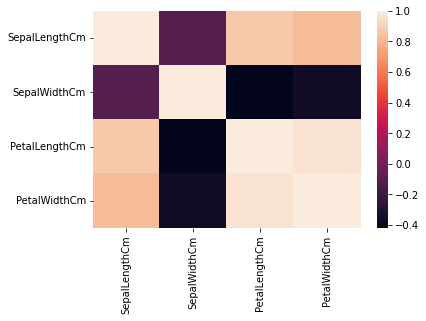

In [164]:
sns.heatmap(data=iris.corr())

#Bar Plot

In [165]:
iris['Species'].value_counts() # count the number of each Species

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

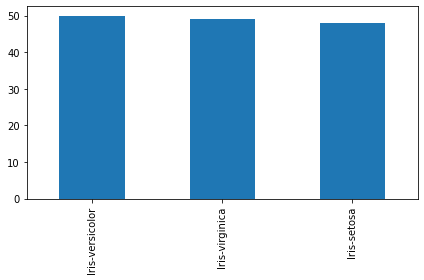

In [166]:
iris['Species'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

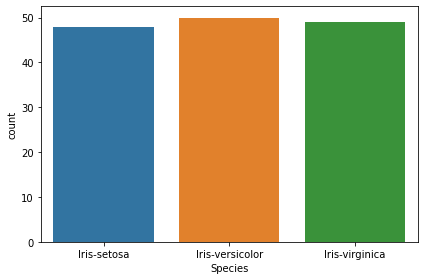

In [167]:
sns.countplot(data=iris, x='Species')
plt.tight_layout()

#Pai Chart

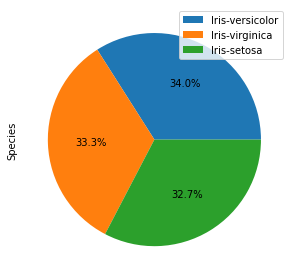

In [168]:
iris['Species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

#Line Plot

Text(0.5, 1.0, 'Petal Width')

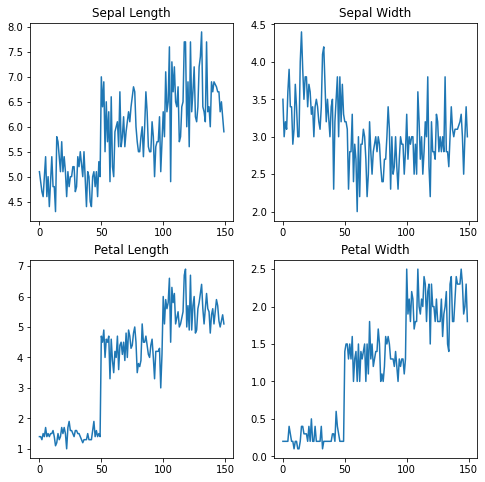

In [169]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

iris['SepalLengthCm'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Sepal Length')

iris['SepalWidthCm'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Sepal Width')

iris.PetalLengthCm.plot.line(ax=ax[1][0])
ax[1][0].set_title('Petal Length')

iris.PetalWidthCm.plot.line(ax=ax[1][1])
ax[1][1].set_title('Petal Width')

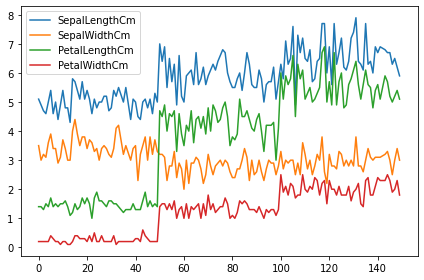

In [170]:
iris.plot()
plt.tight_layout()

# Histogram

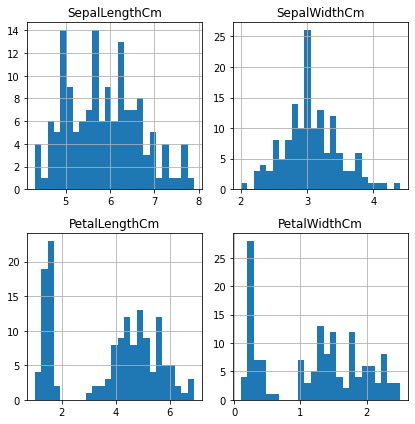

In [171]:
iris.hist(figsize=(6,6), bins=25)
plt.tight_layout()

#Scatter Plot

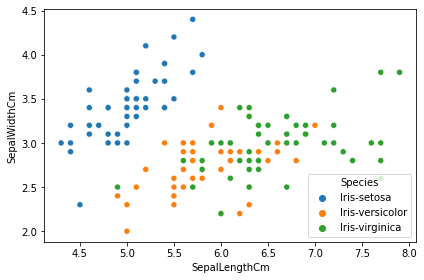

In [172]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species')
plt.tight_layout()

#Pair Plot

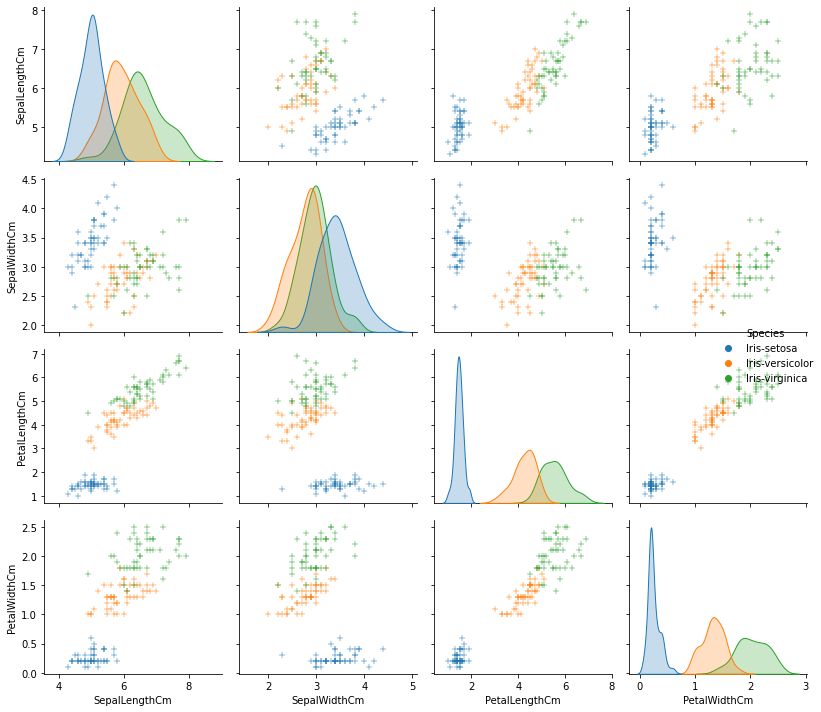

In [173]:
sns.pairplot(iris, hue='Species', markers='+')
plt.tight_layout()

#Violin Plot

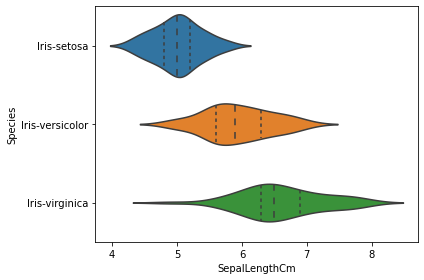

In [174]:
sns.violinplot(data=iris, y='Species', x='SepalLengthCm', inner='quartile')
plt.tight_layout()

#Classification Models
    **Dataset  will be divided into 2 sets**

1.   Training Set
2.   Testing Set



In [175]:
from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluation of model performance

In [176]:
X = iris.drop(columns='Species') # assign features to variable X
X.head(10)                       # Displays the first 10 lines

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [177]:
y = iris['Species'] # put class label (target)the variable y
y.head(10)          # show first 10 lines

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

#Split the dataset into testing and training set

In [178]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(117, 4)
(117,)

testing dataset:
(30, 4)
(30,)


#KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # Algorithm Configuration
    model_knn.fit(X_train, y_train)                 # training model/classifier
    y_pred = model_knn.predict(X_test)              # Make Predictions
    scores.append(accuracy_score(y_test, y_pred))   # evaluasi performa

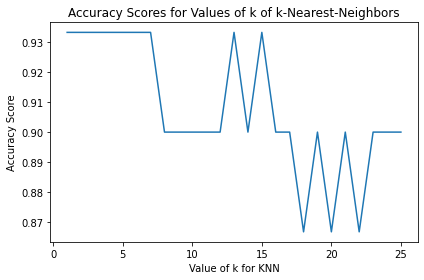

In [180]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [181]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

In [182]:
print(accuracy_score(y_test, y_pred)) # Nilai akurasi

0.9333333333333333


In [144]:
print(confusion_matrix(y_test, y_pred)) # Confusion matrix

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [145]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC

In [ ]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

In [ ]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
# 'KNN'- 'LogReg' - 'SVC' - 'DT' - 'RF'   
print(accuracy_scores)